In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock = yf.download("AAPL",start = ("2019-01-01"),end = ("2022-12-31"))

[*********************100%***********************]  1 of 1 completed


In [3]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.061703,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.105145,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.309578,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.774227,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.694618,219111200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63771000
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400


In [4]:
stock.drop(columns = ["Open","High","Low","Volume","Close"],inplace = True)

In [5]:
stock.rename(columns = {"Adj Close":"adj_close"},inplace = True)

In [6]:
stock

,adj_close
Date,
2018-12-31,38.061703
2019-01-02,38.105145
2019-01-03,34.309578
2019-01-04,35.774227
2019-01-07,35.694618
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [7]:
stock["simple_return"] = stock.pct_change()

In [8]:
stock["pimple_return"] = stock["adj_close"].pct_change()

In [9]:
stock.drop(columns = ["pimple_return"],inplace = True)

In [10]:
stock["log_returns"] = np.log(stock["adj_close"] / stock["adj_close"].shift(1))

In [11]:
stock.dropna(inplace = True)

In [12]:
%matplotlib inline
plt.style.use("seaborn")

Text(0, 0.5, 'PRICES')

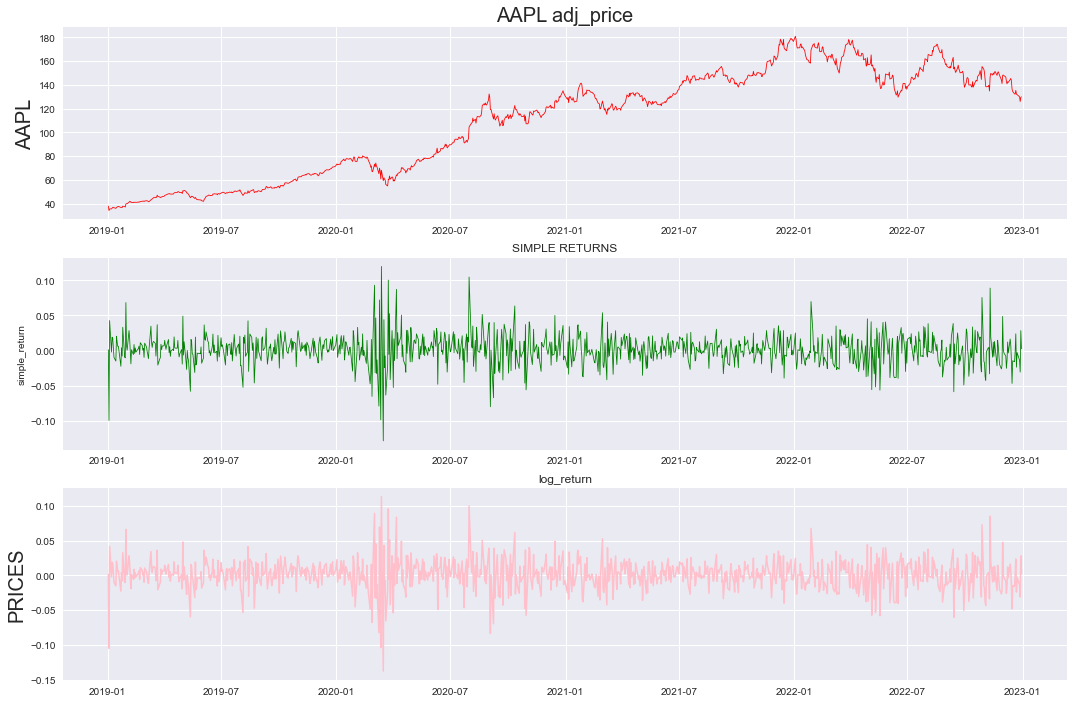

In [13]:

m=3
n=1

fig,ax = plt.subplots(m,n,figsize = (18,12))

ax[0].plot(stock["adj_close"],color = "red",label = "Prices", linewidth = 0.8);
ax[0].set_title("AAPL adj_price",fontsize=20);
ax[0].set_ylabel("AAPL",fontsize=20);

ax[1].plot(stock["simple_return"],color = "green",label = "simple_return",linewidth = 0.8)
ax[1].set_title("SIMPLE RETURNS")
ax[1].set_ylabel("simple_return",fontsize = 10);

ax[2].plot(stock['log_returns'],color="pink",label = "LOG_RETUNS",linewidth = 1.5)
ax[2].set_title("log_return")
ax[2].set_ylabel('PRICES',fontsize = 20)

<AxesSubplot:xlabel='Date'>

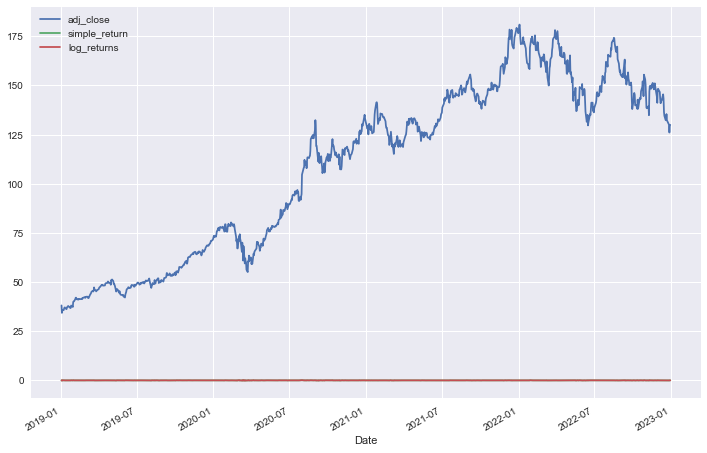

In [14]:
stock.plot(figsize = (12,8))

In [15]:
def realized_vol(x):
    return np.sqrt(np.sum(x ** 2))

In [16]:
df1_real_vol = stock.groupby(pd.Grouper(freq =  "M"))[['log_returns']].apply(realized_vol)

In [17]:
df1_real_vol.rename(columns={"log_returns":"realized_vol"},inplace  = True)

In [18]:
df1_real_vol = df1_real_vol * np.sqrt(12)

In [19]:
df1_real_vol

,realized_vol
Date,
2019-01-31,0.497728
2019-02-28,0.152880
2019-03-31,0.226463
2019-04-30,0.146772
2019-05-31,0.352036
2019-06-30,0.228380
2019-07-31,0.181920
2019-08-31,0.372236
2019-09-30,0.210126


Text(0, 0.5, 'Returns and volatility (in % terms)')

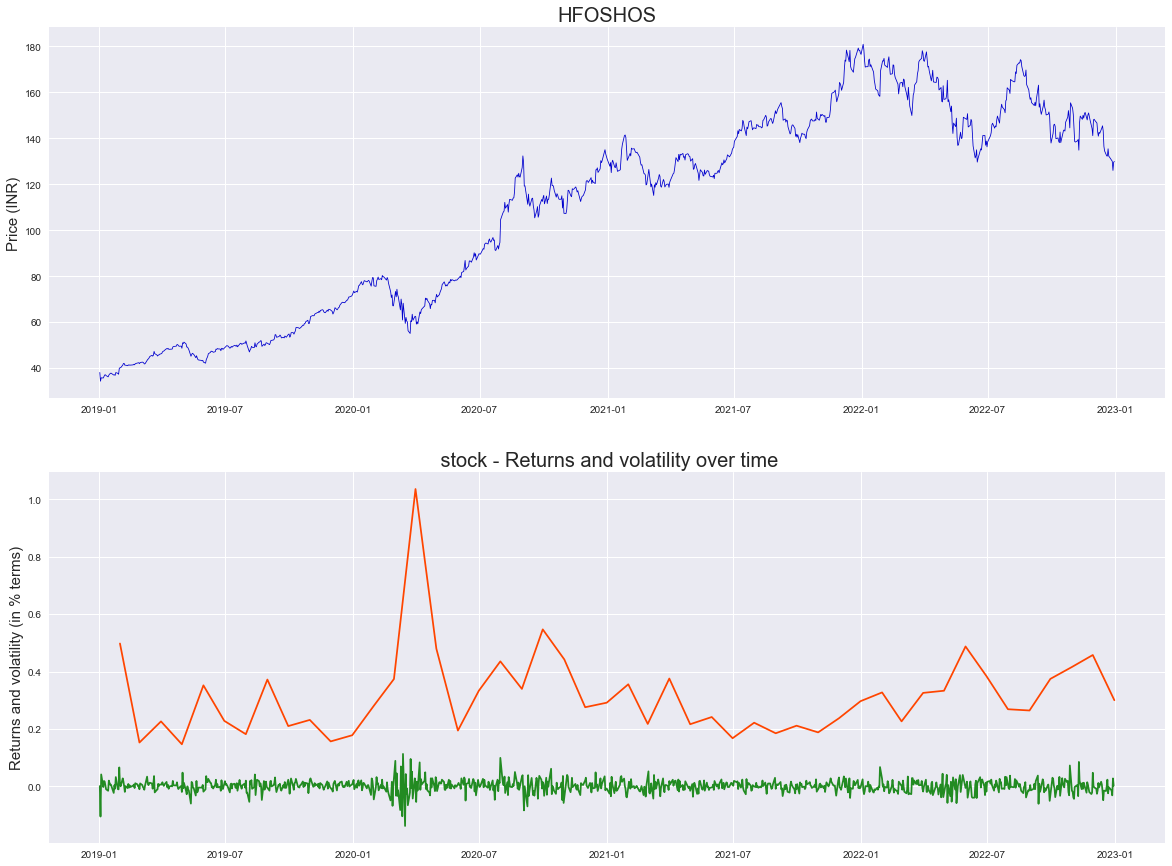

In [20]:
M = 2
N = 1

fig, ax = plt.subplots(M, N, figsize=(20, 15))

ax[0].plot(stock['adj_close'], color='mediumblue', linewidth=0.8, label='Prices')
ax[0].set_title(f"HFOSHOS", fontsize=20)
#ax[0].set_xlabel('Time', fontsize=15)
ax[0].set_ylabel("Price (INR)", fontsize=15)

ax[1].plot(stock['log_returns'], color='forestgreen', label='Log returns')
ax[1].plot(df1_real_vol['realized_vol'], color='orangered', label='Volatility')
ax[1].set_title(f" stock - Returns and volatility over time", fontsize=20)
ax[1].set_ylabel("Returns and volatility (in % terms)", fontsize=15)

In [21]:
df1_rolling_stats = stock["simple_return"].rolling(22).agg(["mean","std"],axis = "rows")

In [22]:
df_all = stock.join(df1_rolling_stats)

In [23]:
def catching_outlinars(row,n_sigmas=3):
    x = row["simple_return"]
    µ = row['mean']
    σ = row['std']
    
    if (x> µ + 3 * σ) | (x < µ - 3 * σ):
        return 1
    else:
        return 0
    

In [25]:
df_all['outlier'] = df_all.apply(catching_outlinars , axis = "columns")

In [27]:
outliers = df_all.loc[df_all['outlier'] == 1 , ['simple_return']]

In [28]:
outliers

,simple_return
Date,
2019-03-11,0.034642
2019-05-01,0.049086
2020-07-31,0.104689
2022-01-28,0.069778


In [30]:
df_all.shape

(1008, 6)